1. Is there a relationship between switching providers (providers - boolean) and the quality of internet service (latency - numeric) we receive, how much do we pay?
- (boolean x numeric) one can compare to latency, see relationship between provider and quality of service offered (t-test)

H0: The server provider does have a lower quality of service.

HA: The internet quality has not changed prior to switching service providers.

T1: At the time the trials were conducted there was regional decline in internet service to all providers.

T2: The internet service provider does have consistently has lower latency levels than that of the the other provider.

2. Does the website redesign provide more engagement (engagements - numeric) and does this lead to more sales (purchased_item - boolean)?
- (numeric x boolean) We can compare the customers engagement and sales prior to the redesign to that of the new website. (t-test)

H0: The redesign has none or less effect to current engagement or sales.

HA: The website redesign really improves the user experience and the interface provides quick access to highly sought items.

T1: The data providing sales information seems to be untrue due to the surge of the product demand at this time of year, results inconclusive.

T2: The website UI and UX seems to have little effect on customers due to seasonal increases. increases persist past times of trials.

3. How are sales performing (sales - numeric) relative to the airing of the new television ad (before_ad, after_ad - boolean)?
- (numeric x boolean) Comparing sales relative to after the release of the new television ad. (t-test)

H0: Sales will slightly increase due to the airing of the TV ad.

HA: Sales will not change due to the airing of the TV ad.

T1: Since the TV ad it seems sales have increased but there is no correlation to the tv ad as this time of year sales have always increased - but they have increased higher than previous years.

T2: The ad really drives sales up but it's not due to the TV ad it went viral on tik tok.

Answer with the type of stats test you would use (assume normal distribution):

- Is there a relationship between the length of your arm and the length of your foot?

(numeric x numeric)

Does smoking affect when or not someone has lung cancer?

Is gender independent of a person’s blood type?

Does whether or not a person has a cat or dog affect whether they live in an apartment?

Does the length of time of the lecture correlate with a student's grade?

In [225]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import env
from pydataset import data

1. Answer with the type of stats test you would use (assume normal distribution):

- Is there a relationship between the length of your arm and the length of your foot?\
        - Pearson's or Spearman's
- Does smoking affect when or not someone has lung cancer?\
        - Chi<sup>2<sup/>
- Is gender independent of a person’s blood type?\
        - Chi<sup>2<sup/>
- Does whether or not a person has a cat or dog affect whether they live in an apartment?\
        - Chi<sup>2<sup/>
- Does the length of time of the lecture correlate with a student's grade?\
        - Pearson's

2. Use the telco_churn data.

- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?

$H_0$: there is no linear correlation between tenure and monthly charges\
$H_a$: there is a linear correlation between tenure and monthly charges

In [226]:
def get_db_url(user,password,host,database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'
url_telco = get_db_url(env.user,env.password,env.host,'telco_churn')
query_telco = 'select * from customers'
telco = pd.read_sql(query_telco,url_telco)


In [227]:
alpha = .5

In [228]:
telco.total_charges
telco.total_charges = telco.total_charges.str.replace(' ','0').astype('float')
#telco.total_charges = pd.to_numeric(telco['total_charges'], errors='coerce')#.astype({'total_charges':'float'})#,errors='ignore')

<Axes: xlabel='total_charges', ylabel='Count'>

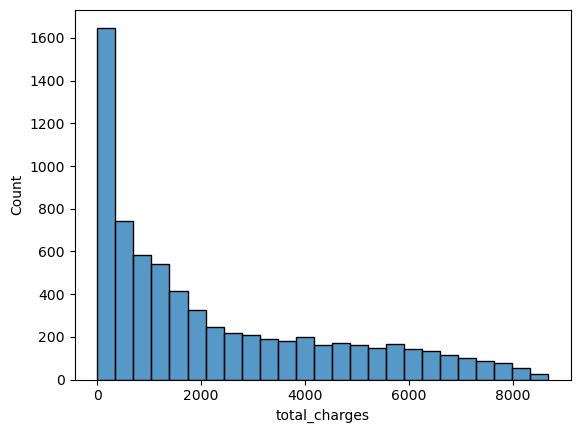

In [229]:
sns.histplot(telco['total_charges'])

In [230]:
phone_service = telco[telco['phone_service'] == 'Yes']
internet_1 = telco[telco['internet_service_type_id'] == 1]
internet_2 = telco[telco['internet_service_type_id'] == 2]

P value: 4.094044991493961e-99, Pearson R: 0.24789985628615008


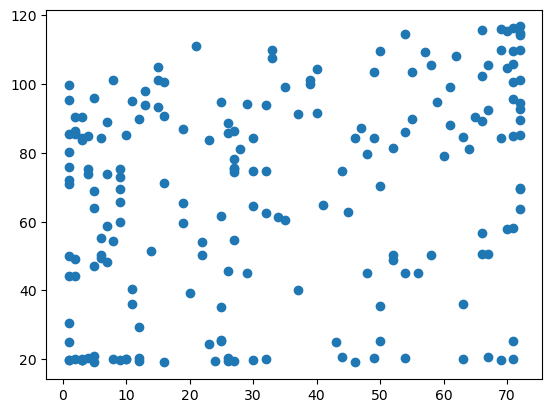

In [231]:
r, p = stats.pearsonr(telco.tenure, telco.monthly_charges)
plt.scatter(telco['tenure'].head(200), telco['monthly_charges'].head(200))
print(f'P value: {p}, Pearson R: {r}')


In [232]:
def eval_dist(r,p,alpha=0.05):
    if p>alpha:
        return print(f'''The data is normally distributed''')
    else:
        return print(f'''The data is NOT normally disributed''')

In [233]:
from scipy.stats import shapiro

In [234]:
r, p = stats.shapiro(telco.monthly_charges)
r, p

/opt/homebrew/Caskroom/miniforge/base/envs/codeup/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9208889007568359, 0.0)

In [235]:
r,p = stats.shapiro(telco.tenure)
eval_dist(r,p)

The data is NOT normally disributed


In [236]:
sr, sp = stats.spearmanr(telco.tenure, telco.monthly_charges)
sr,sp

(0.27641678933130215, 1.0271266876409408e-123)

In [237]:
def eval_Sresults(r,p, alpha=0.05):
    if p < alpha:
        return print(f'''Reject the null hypothesis. There is a linear correlation. Spearman R: {sr}P Value: {sp}.''')
    else:
        return print(f'''We do NOT reject the null hypothesis. There is a linear correlation.) Spearman R: {sr} P Value: {sp}.''')

eval_Sresults(sr,sp)


Reject the null hypothesis. There is a linear correlation. Spearman R: 0.27641678933130215P Value: 1.0271266876409408e-123.


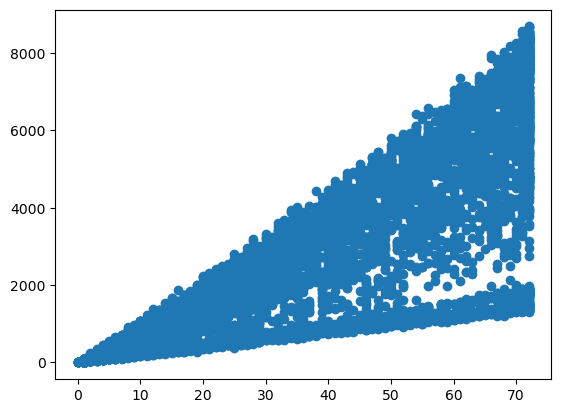

In [238]:
ar, ap = stats.pearsonr(telco['tenure'], telco['total_charges'])
plt.scatter(telco['tenure'], telco['total_charges'])

In [239]:
shap_ar,shap_ap = stats.shapiro(telco['total_charges'])
eval_dist(shap_ar,shap_ap)

The data is NOT normally disributed


In [240]:
sr, pr = stats.spearmanr(telco['tenure'], telco['total_charges'])
eval_Sresults(sr,pr)

Reject the null hypothesis. There is a linear correlation. Spearman R: 0.8896957900597577P Value: 1.0271266876409408e-123.


P value: 7.1178710778977e-88, Pearson R: 0.24538898585362895


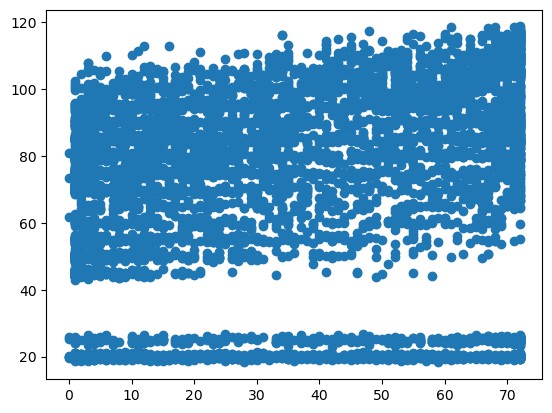

In [241]:
phone_r,phone_p = stats.pearsonr(phone_service['tenure'], phone_service['monthly_charges'])
plt.scatter(phone_service['tenure'], phone_service['monthly_charges'])
print(f'P value: {phone_p}, Pearson R: {phone_r}')

P value: 0.5172828196602484, Pearson R: 8.360426862310417e-166


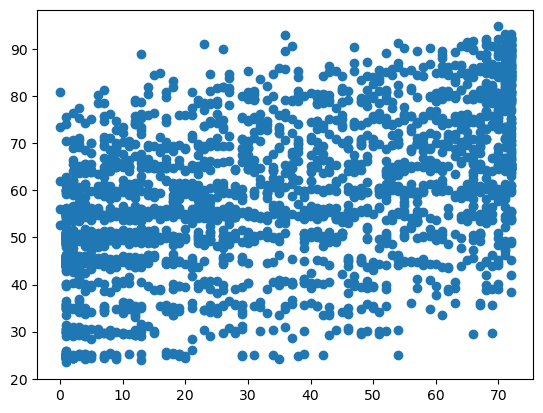

In [242]:
plt.scatter(internet_1['tenure'], internet_1['monthly_charges'])
int1_r,int1_p = stats.pearsonr(internet_1['tenure'], internet_1['monthly_charges'])
print(f'P value: {int1_r}, Pearson R: {int1_p}')

P value: 0.6246206176175588, Pearson R: 0.0


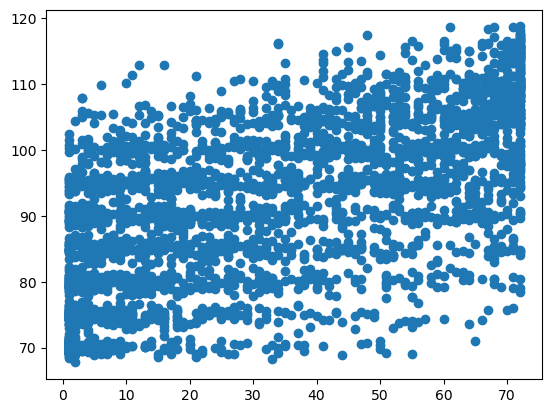

In [243]:
plt.scatter(internet_2['tenure'], internet_2['monthly_charges'])
int2_r,int2_p = stats.pearsonr(internet_2['tenure'], internet_2['monthly_charges'])
print(f'P value: {int2_r}, Pearson R: {int2_p}')

3. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [244]:
url_employees = get_db_url(env.user,env.password,env.host,'employees')
query_employees = 'select * from employees as e join salaries as s on e.emp_no = s.emp_no where s.to_date > now()'
employees = pd.read_sql(query_employees,url_employees)

In [245]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   emp_no      240124 non-null  int64 
 7   salary      240124 non-null  int64 
 8   from_date   240124 non-null  object
 9   to_date     240124 non-null  object
dtypes: int64(3), object(7)
memory usage: 18.3+ MB


In [246]:
employees.hire_date.dtype

dtype('O')

In [247]:
# converting date time to work with stats
from datetime import date
employees['tenure'] = (employees.to_date - employees.hire_date)
employees['tenure'].astype('int')

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'datetime.timedelta'

In [ ]:
emp_r, emp_p = stats.pearsonr(employees['amount_days'],employees['salary'])
# could not find proper date conversion, only a datetime.timedelta
sns.scatterplot(x=employees['hire_date'].head(10),y=employees['salary'].head(10),data=employees)
print(f'P value: {emp_r}, Pearson R: {emp_p}')

TypeError: unsupported operand type(s) for +: 'float' and 'datetime.timedelta'

In [ ]:
query_titles = 'select * from employees as e join titles as t on e.emp_no = t.emp_no where t.to_date < now()'
titles = pd.read_sql(query_employees,url_employees)

In [ ]:
sns.scatterplot(x=titles['emp_no'].head(10),y=employees['title'].head(10),data=employees)

KeyError: 'title'

4. Use the sleepstudy data.
- Is there a relationship between days and reaction time?

In [ ]:
sleep = data('sleepstudy')

In [ ]:
sleep

Reaction  Days  Subject
1    249.5600     0      308
2    258.7047     1      308
3    250.8006     2      308
4    321.4398     3      308
5    356.8519     4      308
..        ...   ...      ...
176  329.6076     5      372
177  334.4818     6      372
178  343.2199     7      372
179  369.1417     8      372
180  364.1236     9      372

[180 rows x 3 columns]

In [ ]:
sleep_r, sleep_p = stats.pearsonr(sleep['Days'],sleep['Reaction'])
print(f'P value: {sleep_r}, Pearson R: {sleep_p}')

P value: 0.5352302262650253, Pearson R: 9.89409632221466e-15


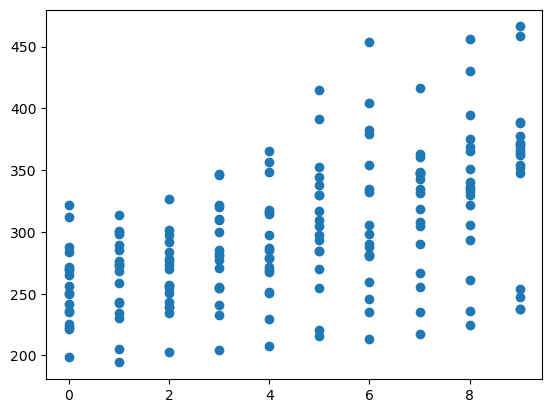

In [ ]:
plt.scatter(sleep['Days'],sleep['Reaction'])

## Comparison of Means

### 1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?
    - Discrete & Continious // t-test 1 sample, 2 tailed
- Are adults who drink milk taller than adults who don't drink milk?
    - Discrete & Continious // t-test 1 sample, 2 tailed
- Is the price of gas higher in Texas or in New Mexico?
    - Discrete & Continious // t-test 2 sample, 2 tailed
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
    - Discrete & Continious // t-test 2 sample, 1 tailed
    - Analysis of variance OR ANOVA
    - if measured as (low,med,high) X (ds,wd,cap) - therefore turning the analysis into a categorical
    - manifested into a proportion test // chi<sup>2</sup>

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

#### 2A: Office 1 sells more homes ~34.5% of the time.

$H_0$: Office 1 on average sells more houses than Office 2.\
$H_a$: Office 1 does not sell more houses on average than Office 2.

In [259]:
off1 = 90
off1_std = 15
off2 = 100
off2_std = 20
trials = 100000
a = .05

In [442]:
stats.ttest_ind_from_stats?

Signature:
stats.ttest_ind_from_stats(
    mean1,
    std1,
    nobs1,
    mean2,
    std2,
    nobs2,
    equal_var=True,
    alternative='two-sided',
)
Docstring:
T-test for means of two independent samples from descriptive statistics.

This is a test for the null hypothesis that two independent
samples have identical average (expected) values.

Parameters
----------
mean1 : array_like
    The mean(s) of sample 1.
std1 : array_like
    The corrected sample standard deviation of sample 1 (i.e. ``ddof=1``).
nobs1 : array_like
    The number(s) of observations of sample 1.
mean2 : array_like
    The mean(s) of sample 2.
std2 : array_like
    The corrected sample standard deviation of sample 2 (i.e. ``ddof=1``).
nobs2 : array_like
    The number(s) of observations of sample 2.
equal_var : bool, optional
    If True (default), perform a standard independent 2 sample test
    that assumes equal population variances [1]_.
    If False, perform Welch's t-test, which does not assume equal
   

In [448]:
t, p = stats.ttest_ind_from_stats(off1, off1_std, 40,off2, off2_std, 50)

print(t, p/2, a)

-2.6252287036468456 0.005104926224619695 0.05


In [447]:
office1 = np.random.normal(off1,off1_std,size=(40,))
office2 = np.random.normal(off2,off2_std,size=(50,))
office_1_rvs = stats.norm(off1,off1_std).rvs(40)
office_2_rvs = stats.norm(off2,off2_std).rvs(50)

#compare = (office1 > office2)

#compare_sum = (compare == True).sum()
#compare_sum / trials * 100

### 3. Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [311]:
mpg = data('mpg')

In [312]:
mpg

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
1           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
2           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
3           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
4           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
5           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
230   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
231   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
232   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
233   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
234   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
1    compact  
2    compact  
3    compact  
4    compact  
5    compact  
..       ...  
230  midsize  
231  midsize  
232  midsize  
233  midsize  
234  midsize  

[234 rows x 11 columns]

$H_0$: There is *NOT* a difference in fuel efficiency from vehicles in 1999 compared to 2008.\
$H_a$: There is a difference in fuel efficiency from vehicles in 1999 compared to 2008.

In [452]:
mpg['avg_miles'] = (mpg['cty'] + mpg['hwy']) / 2
mpg

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
1           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
2           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
3           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
4           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
5           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
230   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
231   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
232   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
233   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
234   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  avg_miles  
1    compact       23.5  
2    compact       25.0  
3    compact       25.5  
4    compact       25.5  
5    compact       21.0  
..       ...        ...  
230  midsize       23.5  
231  midsize       25.0  
232  midsize       21.0  
233  midsize       22.0  
234  midsize       21.5  

[234 rows x 12 columns]

In [454]:
car_1999 = mpg[mpg['year'] == 1999]
car_2008 = mpg[mpg['year'] == 2008]
car_1999mi = car_1999['avg_miles']
car_2008mi = car_2008['avg_miles']

In [457]:
lev_stat, p = stats.levene(car_1999mi,car_2008mi)

p, lev_stat

(0.855517569468803, 0.033228136671080453)

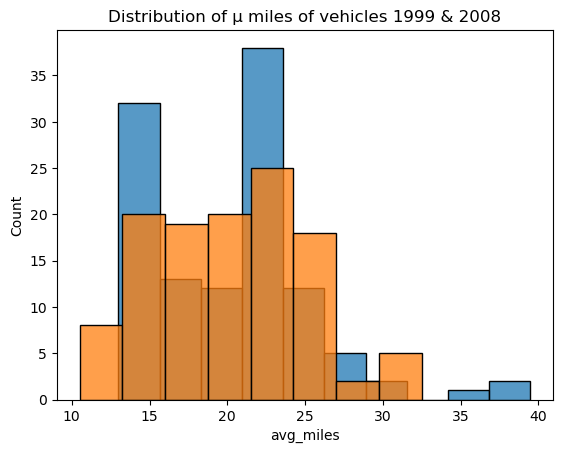

In [351]:
sns.histplot(car_1999mi)
sns.histplot(car_2008mi)
plt.title('Distribution of µ miles of vehicles 1999 & 2008')
plt.show()

In [399]:
t, p = stats.ttest_ind(car_1999mi, car_2008mi)
t, p
print(f"t < 0:", t > 0)
print(f"We reject the null hypothesis; p/2 < alpha:", p/2 < a)


t < 0: True
We reject the null hypothesis; p/2 < alpha: False


$H_0$: Compact cars are more fuel efficient than the average cars.\
$H_a$: Compact cars are *NOT* more fuel efficient than the average cars.

Avg 1 group vs. avg of population

In [472]:
compact_avg = mpg['avg_miles'][mpg['class'] == 'compact']
avg_miles = mpg['avg_miles'].mean()
avg_samp = mpg['avg_miles'][mpg['class'] == '']
print(len(compact_avg))
len(avg_miles_samp)

47


47

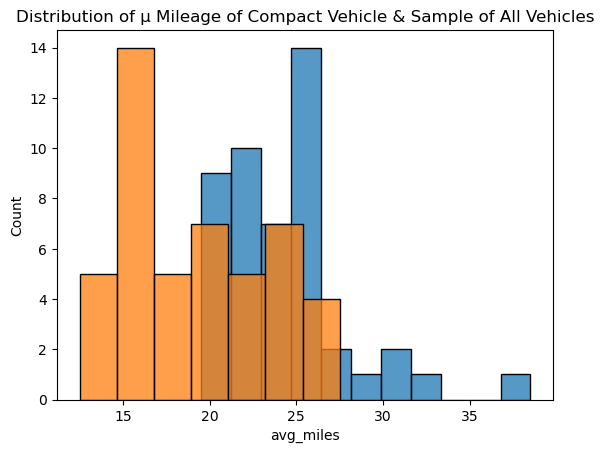

In [470]:
sns.histplot(compact_avg)
sns.histplot(avg_miles_samp)
plt.title('Distribution of µ Mileage of Compact Vehicle & Sample of All Vehicles')
plt.show()

In [ ]:
# Wilcoxon stats test because comparing to average of the population and distribution is not(?) normal.
#t2, p2 = stats.wilcoxon(compact_avg,avg_miles)
#print(f"t < 0:", t2 > 0)
#print(f"We accept the null hypothesis; p/2 < alpha:", p2/2 > a)
#t2, p2

In [465]:
# 1 sample ttest - avg compact car (x) avg_miles of population
t3, p3 = stats.ttest_1samp(compact_avg, avg_miles)
print(f"t < 0:", t3 > 0)
print(f"We accept the null hypothesis; p/2 < alpha:", p3/2 > alpha)
t3, p3

t < 0: True
We accept the null hypothesis; p/2 < alpha: False


(9.881668054080283, 5.935218349674527e-13)

$H_0$: Automatic transmission vehicles are more fuel efficient than manual transmission vehicles.\
$H_a$: Automatic transmission vehicles *NOT* more fuel efficient than manual transmission vehicles.

1 group (x) 1 group

In [432]:
auto = mpg['avg_miles'][mpg['trans'].str.contains('auto')]
auto_samp = mpg['avg_miles'][mpg['trans'].str.contains('auto')].sample(77)
manual = mpg['avg_miles'][mpg['trans'].str.contains('manual')]
len(manual)

77

Text(0.5, 1.0, 'µ fuel efficiency, Automatic & Manual')

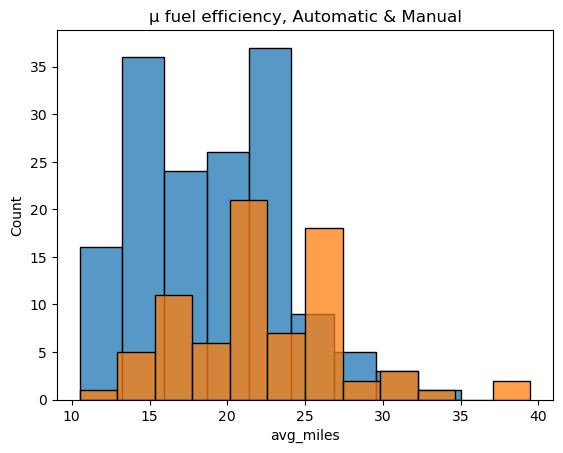

In [476]:
sns.histplot(auto)
sns.histplot(manual)
plt.title('µ fuel efficiency, Automatic & Manual')

In [480]:
t4, p4 = stats.ttest_ind(auto, manual,equal_var=True)
print(f"t < 0:", t4 < 0)
print(f"We reject the null hypothesis; p/2 < alpha:", p4/2 < alpha)
t4, p5

t < 0: True
We reject the null hypothesis; p/2 < alpha: True


(-4.593437735750014, 9.859599786061749e-06)

In [479]:
t5, p5 = stats.mannwhitneyu(auto,manual)
print(f"t < 0:", t5 < 0)
print(f"We reject the null hypothesis; p/2 < alpha:", p5/2 < alpha)
t5, p5

t < 0: False
We reject the null hypothesis; p/2 < alpha: True


(3895.5, 9.859599786061749e-06)

### 1. Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.
 			Codeup Student	Not Codeup Student
Uses a Macbook		49				20\
Doesn't Use A Macbook	1			30

In [494]:
d = {'codeup_student':[49, 20], 'not_codeup_student':[1, 30]}
macbook = pd.DataFrame(index=['uses_macbook','does_not_use'], columns=['codeup_student','not_codeup_student'],data = d)
macbook

codeup_student  not_codeup_student
uses_macbook              49                   1
does_not_use              20                  30

In [488]:
# setting alpha
α = .05

$H_0$: there is no association between codeup student computers vs none codeup student computers\
$H_a$: there is an association between codeup student computers vs none codeup student computers\
\
Set crosstab - in this case data is already cross tabular.

In [531]:
chi2, p ,degf, expected = stats.chi2_contingency(macbook)
p

1.4116760526193832e-09

In [532]:
def checkp():
    if p < α:
        print('we reject our null hypothesis')
    else:
        print('we fail to reject our null hypothesis')

checkp()

we reject our null hypothesis


#### - 1A: There is a statistical association between having a macbook and being a codeup student vs otherwise.

### 2. Choose another 2 categorical variables from the mpg dataset.

- State your null and alternative hypotheses.
- State your alpha.
- Perform a chi<sup>2</sup> test of independence.
- State your conclusion

$H_0$: there is no association between drive type and transmission\
$H_a$: there is an association between drive type and transmission

In [509]:
mpg.drv.unique()

array(['f', '4', 'r'], dtype=object)

In [535]:
α = .05

In [512]:
mpg.trans.unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [516]:
mpg['drive'] = mpg.trans.str.contains('auto')

In [714]:
drive_tab = pd.crosstab(mpg['drv'], mpg['drive'])
drive_tab

drive  False  True 
drv                
4         28     75
f         41     65
r          8     17

In [715]:
chi2, p, degf, expected = stats.chi2_contingency(drive_tab)
p

0.20838152534979626

In [534]:
checkp()

we fail to reject our null hypothesis


### 3. Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

$H_0$: there is no association between gender and sales or marketing\
$H_a$: there is an association between gender and sales or marketing

α is set.

In [639]:
url_employees = get_db_url(env.user,env.password,env.host,'employees')
query_employees = 'select * from employees as e\
    join dept_emp as de on e.emp_no = de.emp_no\
    join departments d on de.dept_no = d.dept_no\
    where de.to_date > now()'

employees_by_dept = pd.read_sql(query_employees,url_employees)

In [622]:
employees_by_dept

emp_no  birth_date first_name    last_name gender   hire_date  emp_no  \
0        10038  1960-07-20       Huan        Lortz      M  1989-09-20   10038   
1        10049  1961-04-24      Basil       Tramer      F  1992-05-04   10049   
2        10060  1961-10-15   Breannda  Billingsley      M  1987-11-02   10060   
3        10088  1954-02-25   Jungsoon     Syrzycki      F  1988-09-02   10088   
4        10112  1963-08-13   Yuichiro        Swick      F  1985-10-08   10112   
...        ...         ...        ...          ...    ...         ...     ...   
240119  499966  1955-12-04    Mihalis     Crabtree      F  1985-06-13  499966   
240120  499976  1963-08-20   Guozhong       Felder      M  1988-12-26  499976   
240121  499980  1959-06-28       Gino        Usery      M  1991-02-11  499980   
240122  499986  1952-07-22     Nathan        Ranta      F  1985-08-11  499986   
240123  499987  1961-09-05      Rimli       Dusink      F  1998-09-20  499987   

       dept_no   from_date     to_date dept_no         dept_name  
0         d009  1989-09-20  9999-01-01    d009  Customer Service  
1         d009  1992-05-04  9999-01-01    d009  Customer Service  
2         d009  1992-11-11  9999-01-01    d009  Customer Service  
3         d009  1992-03-21  9999-01-01    d009  Customer Service  
4         d009  1998-05-01  9999-01-01    d009  Customer Service  
...        ...         ...         ...     ...               ...  
240119    d007  1985-06-13  9999-01-01    d007             Sales  
240120    d007  1988-12-26  9999-01-01    d007             Sales  
240121    d007  1991-02-11  9999-01-01    d007             Sales  
240122    d007  1985-08-11  9999-01-01    d007             Sales  
240123    d007  1999-12-21  9999-01-01    d007             Sales  

[240124 rows x 12 columns]

In [565]:
employees_by_dept['dept_name'].unique()

array(['Customer Service', 'Development', 'Finance', 'Human Resources',
       'Marketing', 'Production', 'Quality Management', 'Research',
       'Sales'], dtype=object)

In [603]:
gender = employees['gender']
sales_marketing = employees_by_dept['dept_name'][employees_by_dept['dept_name'].str.contains('Marketing|Sales')]

In [627]:
gender_dept = pd.crosstab(gender,sales_marketing)
gender_dept

dept_name  Marketing  Sales
gender                     
F               5864  14999
M               8978  22702

In [609]:
chi2, p, degf, expected = stats.chi2_contingency(gender_dept)
p

0.5691938610810126

In [610]:
checkp()

we fail to reject our null hypothesis


$H_0$: there is no association between gender and management\
$H_a$: there is an association between gender and management

α is set.

In [682]:
query_managers = 'select * from employees e join dept_manager dm on e.emp_no = dm.emp_no'
managers = pd.read_sql(query_managers, url_employees)
managers
query_employees_mans = 'select * from employees'
employees_mans = pd.read_sql(query_employees_mans,url_employees)

In [652]:
managers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_date  24 non-null     object
 1   first_name  24 non-null     object
 2   last_name   24 non-null     object
 3   gender      24 non-null     object
 4   hire_date   24 non-null     object
 5   dept_no     24 non-null     object
 6   from_date   24 non-null     object
 7   to_date     24 non-null     object
dtypes: object(8)
memory usage: 1.6+ KB


In [685]:
managers = managers.drop_duplicates()
managers


emp_no  birth_date   first_name     last_name gender   hire_date dept_no  \
0   110022  1956-09-12    Margareta    Markovitch      M  1985-01-01    d001   
1   110039  1963-06-21     Vishwani      Minakawa      M  1986-04-12    d001   
2   110085  1959-10-28         Ebru         Alpin      M  1985-01-01    d002   
3   110114  1957-03-28        Isamu    Legleitner      F  1985-01-14    d002   
4   110183  1953-06-24      Shirish  Ossenbruggen      F  1985-01-01    d003   
5   110228  1958-12-02      Karsten       Sigstam      F  1985-08-04    d003   
6   110303  1956-06-08    Krassimir       Wegerle      F  1985-01-01    d004   
7   110344  1961-09-07       Rosine         Cools      F  1985-11-22    d004   
8   110386  1953-10-04         Shem        Kieras      M  1988-10-14    d004   
9   110420  1963-07-27        Oscar      Ghazalie      M  1992-02-05    d004   
10  110511  1957-07-08     DeForest      Hagimont      M  1985-01-01    d005   
11  110567  1964-04-25         Leon      DasSarma      F  1986-10-21    d005   
12  110725  1961-03-14    Peternela       Onuegbe      F  1985-01-01    d006   
13  110765  1954-05-22       Rutger       Hofmeyr      F  1989-01-07    d006   
14  110800  1963-02-07       Sanjoy       Quadeer      F  1986-08-12    d006   
15  110854  1960-08-19         Dung         Pesch      M  1989-06-09    d006   
16  111035  1962-02-24  Przemyslawa     Kaelbling      M  1985-01-01    d007   
17  111133  1955-03-16        Hauke         Zhang      M  1986-12-30    d007   
18  111400  1959-11-09         Arie       Staelin      M  1985-01-01    d008   
19  111534  1952-06-27       Hilary        Kambil      F  1988-01-31    d008   
20  111692  1954-10-05        Tonny   Butterworth      F  1985-01-01    d009   
21  111784  1956-06-14        Marjo    Giarratana      F  1988-02-12    d009   
22  111877  1962-10-18      Xiaobin      Spinelli      F  1991-08-17    d009   
23  111939  1960-03-25      Yuchang       Weedman      M  1989-07-10    d009   

     from_date     to_date  
0   1985-01-01  1991-10-01  
1   1991-10-01  9999-01-01  
2   1985-01-01  1989-12-17  
3   1989-12-17  9999-01-01  
4   1985-01-01  1992-03-21  
5   1992-03-21  9999-01-01  
6   1985-01-01  1988-09-09  
7   1988-09-09  1992-08-02  
8   1992-08-02  1996-08-30  
9   1996-08-30  9999-01-01  
10  1985-01-01  1992-04-25  
11  1992-04-25  9999-01-01  
12  1985-01-01  1989-05-06  
13  1989-05-06  1991-09-12  
14  1991-09-12  1994-06-28  
15  1994-06-28  9999-01-01  
16  1985-01-01  1991-03-07  
17  1991-03-07  9999-01-01  
18  1985-01-01  1991-04-08  
19  1991-04-08  9999-01-01  
20  1985-01-01  1988-10-17  
21  1988-10-17  1992-09-08  
22  1992-09-08  1996-01-03  
23  1996-01-03  9999-01-01

In [686]:
man_no = managers['emp_no']

In [687]:
emp_nums = employees_mans['emp_no']

In [702]:
man_gend = employees['gender'][emp_nums[man_no]]

In [713]:
gender_management=pd.crosstab(man_gend, employees_mans['gender'])
gender_management

gender  F  M
gender      
F       7  5
M       3  9

In [710]:
chi2, p, degf, expectency = stats.chi2_contingency(gender_management)
p

0.21419302571912477

In [712]:
checkp()

we fail to reject our null hypothesis
